In [1]:
import pandas as pd
from pandas import Series
import glob
import plotly
import plotly.express as px  # import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.io as pio
#pio.templates.default = 'plotly_white'

In [15]:
def calc_corr(a,b):
    s1 = Series(a)
    s2 = Series(b)
    return round(s1.corr(s2), 3)

In [36]:
# human tcr
df = pd.read_csv("/SGRNJ06/randd/USER/cjj/celedev/vdj_bulk/20230727plot/8/8.csv")
df = df.dropna(axis=0)
df

,Raw_Reads,UMI_Counts,UMIs_Mapped_Confidently_To_VJ_Gene,UMIs_Mapped_To_TRA,UMIs_Mapped_To_TRB,Clonotype_Diversity,Sample
0,"3,267,154","70,981","18,046(70.76%)","6,375(25.0%)","11,658(45.71%)","1,448.93",Hum_PBMC_1
1,"3,120,341","68,534","16,847(70.14%)","5,826(24.26%)","11,015(45.86%)","1,422.92",Hum_PBMC_2
2,"3,180","1,901",358(67.04%),125(23.41%),233(43.63%),318.35,Hum_3T3_3
3,"2,770,511","59,662","14,853(70.57%)","5,117(24.31%)","9,729(46.22%)","1,350.26",Hum_PBMC_4
4,"2,624,531","60,103","14,991(70.52%)","5,020(23.61%)","9,952(46.82%)","1,428.44",Hum_PBMC_5
5,"3,871","2,422",521(72.77%),162(22.63%),359(50.14%),474.18,Hum_3T3_6
6,"3,723,090","78,970","19,400(69.64%)","6,509(23.36%)","12,882(46.24%)","1,492.71",Hum_PBMC_7
7,"3,459,405","70,034","18,097(69.81%)","6,179(23.84%)","11,871(45.79%)","1,359.42",Hum_PBMC_8


In [37]:
df["Raw_Reads"] = df["Raw_Reads"].str.replace(',','').astype(int)
df["UMI_Counts"] = df["UMI_Counts"].str.replace(',','').astype(int)
df["Clonotype_Diversity"] = df["Clonotype_Diversity"].astype(str).str.replace(',','').astype(float)
df["UMIs_Mapped_Confidently_To_VJ_Gene"] = df["UMIs_Mapped_Confidently_To_VJ_Gene"].apply(lambda x: x.split('(')[-1]).str.replace(')','').str.replace("%",'').astype(float)
df["UMIs_Mapped_To_TRA"] = df["UMIs_Mapped_To_TRA"].apply(lambda x: x.split('(')[-1]).str.replace(')','').str.replace("%",'').astype(float)
df["UMIs_Mapped_To_TRB"] = df["UMIs_Mapped_To_TRB"].apply(lambda x: x.split('(')[-1]).str.replace(')','').str.replace("%",'').astype(float)
df["species"] = "TCR"
df["index"] = df.index
sample = "Hum_PBMC"
OUT_PATH = "/SGRNJ06/randd/USER/cjj/celedev/vdj_bulk/20230727plot/8"

/SGRNJ/Public/Software/conda_env/chenjunjie/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.

/SGRNJ/Public/Software/conda_env/chenjunjie/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.

/SGRNJ/Public/Software/conda_env/chenjunjie/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.



In [38]:
df

,Raw_Reads,UMI_Counts,UMIs_Mapped_Confidently_To_VJ_Gene,UMIs_Mapped_To_TRA,UMIs_Mapped_To_TRB,Clonotype_Diversity,Sample,species,index
0,3267154,70981,70.76,25.00,45.71,1448.93,Hum_PBMC_1,TCR,0
1,3120341,68534,70.14,24.26,45.86,1422.92,Hum_PBMC_2,TCR,1
2,3180,1901,67.04,23.41,43.63,318.35,Hum_3T3_3,TCR,2
3,2770511,59662,70.57,24.31,46.22,1350.26,Hum_PBMC_4,TCR,3
4,2624531,60103,70.52,23.61,46.82,1428.44,Hum_PBMC_5,TCR,4
5,3871,2422,72.77,22.63,50.14,474.18,Hum_3T3_6,TCR,5
6,3723090,78970,69.64,23.36,46.24,1492.71,Hum_PBMC_7,TCR,6
7,3459405,70034,69.81,23.84,45.79,1359.42,Hum_PBMC_8,TCR,7


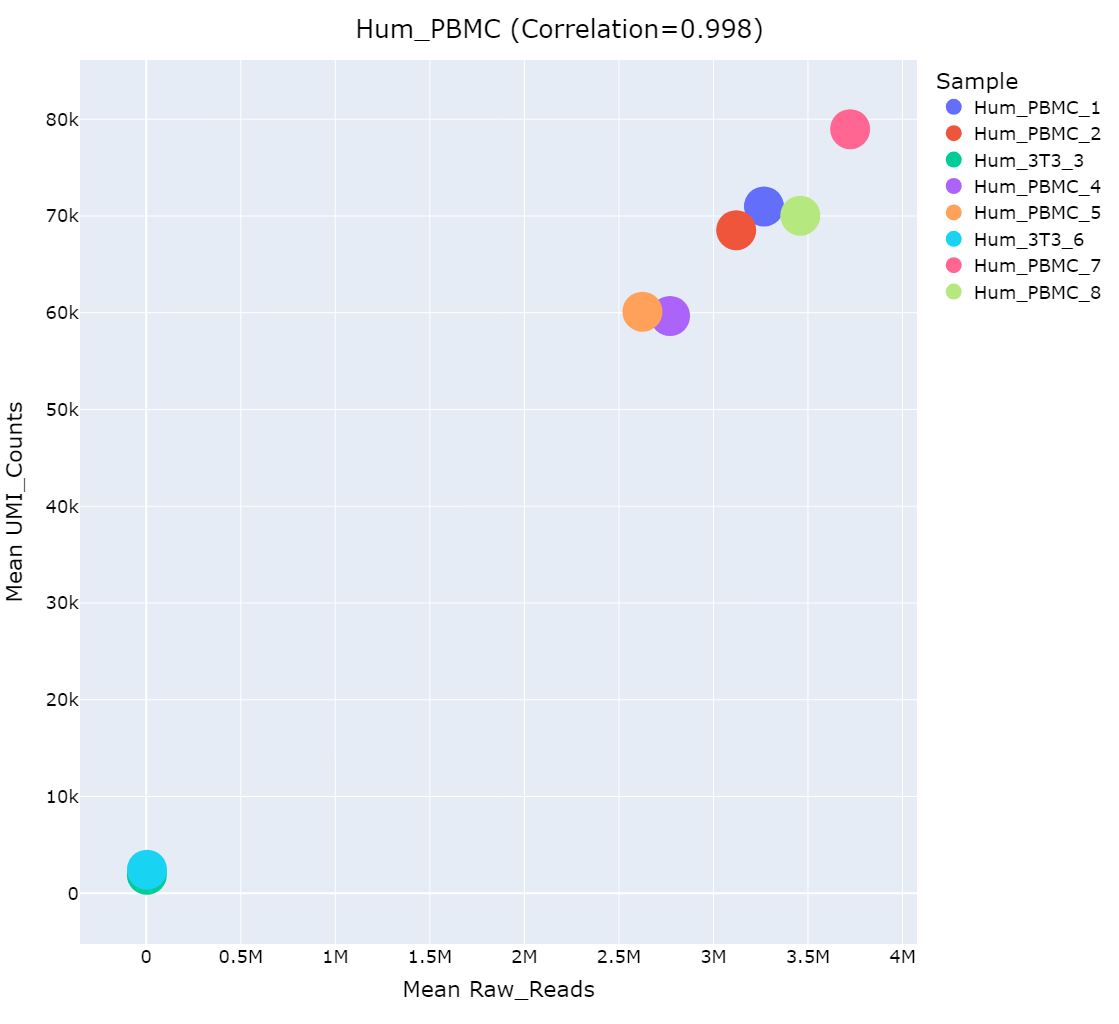

In [39]:
fig = px.scatter(
    df, # scatter绘制散点图
    x='Raw_Reads',    #  x轴
    y='UMI_Counts',  # y轴
    color = 'Sample',
    labels = calc_corr(df["Raw_Reads"], df["UMI_Counts"]),
    width=1680, height=1024,
)
fig.update_traces(marker_size=40)
fig.update_layout(title={"text":f'{sample} (Correlation={calc_corr(df["Raw_Reads"], df["UMI_Counts"])})',
                         'y':0.98, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'},
                  xaxis_title = "Mean Raw_Reads", yaxis_title = "Mean UMI_Counts", font=dict(size=18,color="Black"))

#fig.write_image(f"{OUT_PATH}/scatter.png", scale=4)
fig.show()

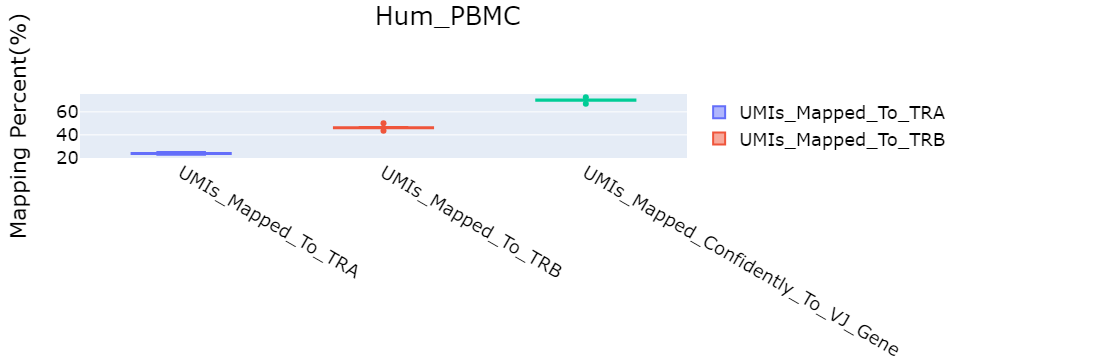

In [40]:
fig = go.Figure()
fig.add_trace(go.Box(y=list(df.UMIs_Mapped_To_TRA),name="UMIs_Mapped_To_TRA"))
fig.add_trace(go.Box(y=list(df.UMIs_Mapped_To_TRB),name="UMIs_Mapped_To_TRB"))
fig.add_trace(go.Box(y=list(df.UMIs_Mapped_Confidently_To_VJ_Gene),name="UMIs_Mapped_Confidently_To_VJ_Gene"))
fig.update_layout(title={"text":f'{sample}',
                         'y':0.98, 'x':0.40, 'xanchor': 'center', 'yanchor': 'top'},
                          yaxis_title = "Mapping Percent(%)", font=dict(size=18,color="Black"))

#fig.write_image(f"{OUT_PATH}/boxplot.png", scale=4, width=1680, height=1024)
fig.show()

In [19]:
fig = px.scatter(
    df, # scatter绘制散点图
    x='Raw_Reads',    #  x轴
    y='Clonotype_Diversity',  # y轴
    #color = 'Clonotype_Diversity',
    labels = calc_corr(df["Raw_Reads"], df["Clonotype_Diversity"]),
    width=1680, height=1024,
    color = 'Sample',
)
fig.update_traces(marker_size=40)
fig.update_layout(title={"text":f'{sample} Diversity (Correlation={calc_corr(df["Raw_Reads"], df["Clonotype_Diversity"])})',
                         'y':0.98, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'},
                  xaxis_title = "Mean Raw_Reads", yaxis_title = "Mean Clonotype_Diversity", font=dict(size=18,color="Black"))

fig.write_image(f"{OUT_PATH}/diversity_read_scatter.png", scale=4)
#fig.show()

In [20]:
fig = px.scatter(
    df, # scatter绘制散点图
    x='UMI_Counts',    #  x轴
    y='Clonotype_Diversity',  # y轴
    color = 'Sample',
    labels = calc_corr(df["UMI_Counts"], df["Clonotype_Diversity"]),
    width=1680, height=1024
)
fig.update_traces(marker_size=40)
fig.update_layout(title={"text":f'{sample} Diversity (Correlation={calc_corr(df["UMI_Counts"], df["Clonotype_Diversity"])})',
                         'y':0.98, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'},
                  xaxis_title = "Mean UMI_Counts", yaxis_title = "Mean Clonotype_Diversity", font=dict(size=18,color="Black"))

fig.write_image(f"{OUT_PATH}/diversity_umi_scatter.png", scale=4)
#fig.show()

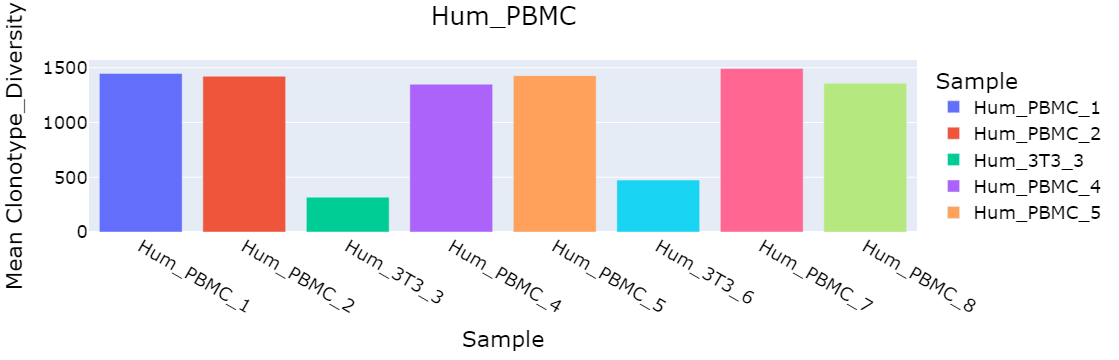

In [41]:
fig = px.bar(df, x="Sample", y="Clonotype_Diversity", color="Sample")
fig.update_layout(title={"text":f'{sample}',
                         'y':0.98, 'x':0.45, 'xanchor': 'center', 'yanchor': 'top'},
                          yaxis_title = "Mean Clonotype_Diversity", font=dict(size=18,color="Black"))
#fig.write_image(f"{OUT_PATH}/Diversity_barplot.png", scale=4, width=1680, height=1024)
fig.show()

In [43]:
# 8
fig = px.bar(df, x="Sample", y="UMIs_Mapped_Confidently_To_VJ_Gene", color="Sample")
fig.update_layout(title={"text":f'{sample}',
                         'y':0.98, 'x':0.45, 'xanchor': 'center', 'yanchor': 'top'},
                          yaxis_title = "UMIs_Mapped_Confidently_To_VJ_Gene(%)", font=dict(size=18,color="Black"))
fig.write_image("/SGRNJ06/randd/USER/cjj/celedev/vdj_bulk/20230727plot/8/mapping_barplot.png", scale=4, width=1680, height=1024)
# fig.show()

In [22]:
# 5_6 
df = df.sort_values("Sample",  key=lambda x: x.str.replace("Mus_Spleen_fresh_",'').str.replace("Mus_Spleen_freeze_",'').str.replace('k','').astype(int))

In [24]:
fig = px.histogram(df, x="Quantity", y="Clonotype_Diversity", color="Group", barmode='group',)
fig.update_layout(title={"text":f'{sample}',
                         'y':0.98, 'x':0.45, 'xanchor': 'center', 'yanchor': 'top'},
                          yaxis_title = "Mean Clonotype_Diversity", font=dict(size=18,color="Black"))
fig.write_image(f"{OUT_PATH}/Diversity_Group_barplot.png", scale=4, width=1680, height=1024)
#fig.show()

In [25]:
df_new = pd.read_csv("/SGRNJ06/randd/USER/cjj/celedev/vdj_bulk/20230727plot/5_6/56_new.csv")

In [ ]:
df_new["Mapping Percent"] = df_new["Mapping Percent"].apply(lambda x: x.split('(')[-1]).str.replace(')','').str.replace("%",'').astype(float)

In [ ]:
df_new

In [32]:
fig = px.box(df_new, x="Mapping GeneType", y="Mapping Percent", color="Group")
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.update_layout(title={"text":f'{sample}',
                         'y':0.98, 'x':0.45, 'xanchor': 'center', 'yanchor': 'top'},
                          yaxis_title = "Mapping Percent(%)", xaxis_title = '', font=dict(size=18,color="Black"))
#fig.show()
fig.write_image(f"{OUT_PATH}/boxplot_Group.png", scale=4, width=1680, height=1024)

In [174]:
import pandas as pd

In [199]:
df = pd.read_csv("/SGRNJ06/randd/USER/cjj/celedev/vdj_bulk/20230727plot/9/9.csv")

In [200]:
df.Raw_Reads = df.Raw_Reads.str.replace(',','').astype(float)
df.UMI_Counts = df.UMI_Counts.str.replace(',','').astype(float)
df.Clonotype_Diversity = df.Clonotype_Diversity.str.replace(',','').astype(float)

In [201]:
df["VJ_Gene_value"] = df["UMIs_Mapped_Confidently_To_VJ_Gene"].apply(lambda x: x.split('(')[0]).str.replace(',','').str.replace(')','').str.replace("%",'').astype(float)
df["VJ_Gene_%"] = df["UMIs_Mapped_Confidently_To_VJ_Gene"].apply(lambda x: x.split('(')[1]).str.replace(',','').str.replace(')','').str.replace("%",'').astype(float)
df["TRA_value"] = df["UMIs_Mapped_To_TRA"].apply(lambda x: x.split('(')[0]).str.replace(',','').str.replace(')','').str.replace("%",'').astype(float)
df["TRA_%"] = df["UMIs_Mapped_To_TRA"].apply(lambda x: x.split('(')[1]).str.replace(',','').str.replace(')','').str.replace("%",'').astype(float)
df["TRB_value"] = df["UMIs_Mapped_To_TRB"].apply(lambda x: x.split('(')[0]).str.replace(',','').str.replace(')','').str.replace("%",'').astype(float)
df["TRB_%"] = df["UMIs_Mapped_To_TRB"].apply(lambda x: x.split('(')[1]).str.replace(',','').str.replace(')','').str.replace("%",'').astype(float)

/SGRNJ/Public/Software/conda_env/chenjunjie/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.

/SGRNJ/Public/Software/conda_env/chenjunjie/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.

/SGRNJ/Public/Software/conda_env/chenjunjie/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.

/SGRNJ/Public/Software/conda_env/chenjunjie/lib/python3.7/site-packages/ipykernel_launcher.py:4: Fut

In [202]:
df_new = df.groupby("Sample").mean().reset_index()

In [203]:
df_new = df_new.sort_values("Sample", key=lambda x: x.str.replace("Mus_0620Spleen_",'').str.replace("w_T3lib",'').astype(int))

In [204]:
df_new["Raw_Reads"] = df_new["Raw_Reads"].apply(lambda x: str(format(int(x), ',')))
df_new["UMI_Counts"] = df_new["UMI_Counts"].apply(lambda x: str(format(int(x), ',')))
df_new["Clonotype_Diversity"] = df_new["Clonotype_Diversity"].apply(lambda x: str(format(round(x, 2), ',')))
df_new["VJ_Gene_value"] = df_new["VJ_Gene_value"].apply(lambda x: str(format(int(x), ',')))
df_new["VJ_Gene_%"] = df_new["VJ_Gene_%"].apply(lambda x: f"({str(format(round(x, 2), ','))}%)")
df_new["TRA_value"] = df_new["TRA_value"].apply(lambda x: str(format(int(x), ',')))
df_new["TRA_%"] = df_new["TRA_%"].apply(lambda x: f"({str(format(round(x, 2), ','))}%)")
df_new["TRB_value"] = df_new["TRB_value"].apply(lambda x: str(format(int(x), ',')))
df_new["TRB_%"] = df_new["TRB_%"].apply(lambda x: f"({str(format(round(x, 2), ','))}%)")

In [205]:
df_new["UMIs_Mapped_Confidently_To_VJ_Gene"] = df_new["VJ_Gene_value"] + df_new["VJ_Gene_%"]
df_new["UMIs_Mapped_To_TRA"] = df_new["TRA_value"] + df_new["TRA_%"]
df_new["UMIs_Mapped_To_TRB"] = df_new["TRB_value"] + df_new["TRB_%"]

In [206]:
df_new = df_new[[
    "Raw_Reads",
    "UMI_Counts",
    "UMIs_Mapped_Confidently_To_VJ_Gene",
    "UMIs_Mapped_To_TRA",
    "UMIs_Mapped_To_TRB",
    "Clonotype_Diversity",
    "Sample"
]]

In [207]:
df_new

,Raw_Reads,UMI_Counts,UMIs_Mapped_Confidently_To_VJ_Gene,UMIs_Mapped_To_TRA,UMIs_Mapped_To_TRB,Clonotype_Diversity,Sample
1,"1,243,165","31,373","6,236(57.62%)","2,395(22.24%)","3,836(35.34%)",821.83,Mus_0620Spleen_1w_T3lib
2,"1,217,725","32,200","5,312(51.6%)","1,457(14.2%)","3,853(37.38%)",950.63,Mus_0620Spleen_3w_T3lib
3,"1,324,051","28,593","5,743(53.8%)","1,324(12.31%)","4,417(41.47%)",602.38,Mus_0620Spleen_5w_T3lib
4,"1,246,175","15,504","3,061(48.8%)",289(4.66%),"2,771(44.13%)",125.84,Mus_0620Spleen_8w_T3lib
0,"1,484,393","15,439","2,788(42.88%)",263(3.87%),"2,525(39.01%)",95.6,Mus_0620Spleen_10w_T3lib


In [208]:
df_new.to_csv("/SGRNJ06/randd/USER/cjj/celedev/vdj_bulk/20230727plot/9/9merge.csv",index=False)

In [189]:
# 克隆型相关性

In [227]:
files = glob.glob("/SGRNJ06/randd/USER/cjj/celedev/vdj_bulk/20230625well/*34index*/05.*/*_clonetypes.csv")
files = [files[1], files[-1], files[0], files[2]]
OUT_PATH = '/SGRNJ06/randd/USER/cjj/celedev/vdj_bulk/20230815plot'

In [228]:
files

['/SGRNJ06/randd/USER/cjj/celedev/vdj_bulk/20230625well/R230616034index1K/05.count_vdj/R230616034index1K_clonetypes.csv',
 '/SGRNJ06/randd/USER/cjj/celedev/vdj_bulk/20230625well/R230616034index2K/05.count_vdj/R230616034index2K_clonetypes.csv',
 '/SGRNJ06/randd/USER/cjj/celedev/vdj_bulk/20230625well/R230616034index4K/05.count_vdj/R230616034index4K_clonetypes.csv',
 '/SGRNJ06/randd/USER/cjj/celedev/vdj_bulk/20230625well/R230616034index5K/05.count_vdj/R230616034index5K_clonetypes.csv']

In [229]:
df1 = pd.read_csv("/SGRNJ06/randd/USER/cjj/celedev/vdj_bulk/20230625well/R230616034index1K/05.count_vdj/R230616034index1K_clonetypes.csv")
df2 = pd.read_csv("/SGRNJ06/randd/USER/cjj/celedev/vdj_bulk/20230625well/R230616034index2K/05.count_vdj/R230616034index2K_clonetypes.csv")
df4 = pd.read_csv("/SGRNJ06/randd/USER/cjj/celedev/vdj_bulk/20230625well/R230616034index4K/05.count_vdj/R230616034index4K_clonetypes.csv")
df5 = pd.read_csv("/SGRNJ06/randd/USER/cjj/celedev/vdj_bulk/20230625well/R230616034index5K/05.count_vdj/R230616034index5K_clonetypes.csv")

In [230]:
df1

,ClonotypeID,aaSeqCDR3,Frequency,Proportion
0,1,TRB:CASSLRTSGAAYEQYF,111,0.63%
1,2,TRA:CAVRPDRDDKIIF,108,0.61%
2,3,TRB:CASSSRLAGGTDTQYF,80,0.45%
3,4,TRA:CALTPEGYQKVTF,42,0.24%
4,5,TRB:CASSLRVGREGNQPQHF,37,0.21%
...,...,...,...,...
3467,3468,TRB:CAISQDGASGYEQYF,1,0.01%
3468,3469,TRB:CAISQDLAGEQYF,1,0.01%
3469,3470,TRB:CAISRQGRDTEAFF,1,0.01%
3470,3471,TRB:CASSQDFNGPCRETQYF,1,0.01%


In [256]:
df_merge = pd.merge(df4, df5, on="aaSeqCDR3")

In [257]:
df_merge = df_merge[["aaSeqCDR3", "Proportion_x", "Proportion_y"]]

In [258]:
df_merge["Proportion_x"] = df_merge["Proportion_x"].apply(lambda x: x.replace('%', '')).astype(float)/100
df_merge["Proportion_y"] = df_merge["Proportion_y"].apply(lambda x: x.replace('%', '')).astype(float)/100

In [259]:
df_merge

,aaSeqCDR3,Proportion_x,Proportion_y
0,TRA:CAVRPDRDDKIIF,0.0060,0.0030
1,TRB:CASSSRLAGGTDTQYF,0.0058,0.0039
2,TRA:CATDARTILRGAQKLVF,0.0036,0.0009
3,TRA:CAVRPDSNYQLIW,0.0033,0.0018
4,TRB:CASSLRTSGAAYEQYF,0.0027,0.0036
...,...,...,...
167,TRB:CASSLAGGGKETQYF,0.0001,0.0001
168,TRB:CASSLADRASGGYTF,0.0001,0.0004
169,TRB:CASSKMPPGPDNEQFF,0.0001,0.0010
170,TRB:CASSLDRASSYEQYF,0.0001,0.0002


In [260]:
fig = px.scatter(
    df_merge, # scatter绘制散点图
    x='Proportion_x',    #  x轴
    y='Proportion_y',  # y轴
    labels = calc_corr(df_merge["Proportion_x"], df_merge["Proportion_y"]),
    width=1024, height=1024,
    color_discrete_sequence=['orange'],
    log_x=True, log_y=True,
    range_x=[0.00001, 0.1],
    range_y=[0.00001, 0.1],
)
fig.update_traces(marker_size=10)
fig.update_layout(title={"text":f'Correlation={calc_corr(df_merge["Proportion_x"], df_merge["Proportion_y"])}',
                         'y':0.98, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'},
                  xaxis_title = "Abundance of each clonotype(% of total)", yaxis_title = "Abundance of each clonotype(% of total)", 
                         font=dict(size=18,color="Black"),
                 )
fig.update_layout(
        xaxis = dict(
            # tickvals = [0, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006]
            tickvals = [0.00001, 0.001, 0.1],
            ticktext = ['1e-5', '1e-3', '1e-1'],
            exponentformat = 'e',
        ),
        yaxis = dict(
            # tickvals = [0, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006]
            tickvals = [0.00001, 0.001, 0.1],
            ticktext = ['1e-5', '1e-3', '1e-1'],
            exponentformat = 'e',
        )
)
fig.write_image(f"{OUT_PATH}/cltypes_scatter_45.png", scale=4)
#fig.show()

In [208]:
df1 = pd.read_csv("/SGRNJ06/randd/USER/cjj/celedev/vdj_bulk/20230625well/R230616034index1K/05.count_vdj/R230616034index1K_clonetypes.csv")
df2 = pd.read_csv("/SGRNJ06/randd/USER/cjj/celedev/vdj_bulk/20230625well/R230616034index2K/05.count_vdj/R230616034index2K_clonetypes.csv")
df4 = pd.read_csv("/SGRNJ06/randd/USER/cjj/celedev/vdj_bulk/20230625well/R230616034index4K/05.count_vdj/R230616034index4K_clonetypes.csv")
df5 = pd.read_csv("/SGRNJ06/randd/USER/cjj/celedev/vdj_bulk/20230625well/R230616034index5K/05.count_vdj/R230616034index5K_clonetypes.csv")

In [209]:
df1['cdr3_length'] = df1['aaSeqCDR3'].str.len()-4
df2['cdr3_length'] = df2['aaSeqCDR3'].str.len()-4
df4['cdr3_length'] = df4['aaSeqCDR3'].str.len()-4
df5['cdr3_length'] = df5['aaSeqCDR3'].str.len()-4

In [210]:
df1_count = df1.groupby('cdr3_length').agg('count').reset_index()[['cdr3_length','ClonotypeID']].rename(columns={'ClonotypeID': 'count'})
df2_count = df2.groupby('cdr3_length').agg('count').reset_index()[['cdr3_length','ClonotypeID']].rename(columns={'ClonotypeID': 'count'})
df4_count = df4.groupby('cdr3_length').agg('count').reset_index()[['cdr3_length','ClonotypeID']].rename(columns={'ClonotypeID': 'count'})
df5_count = df5.groupby('cdr3_length').agg('count').reset_index()[['cdr3_length','ClonotypeID']].rename(columns={'ClonotypeID': 'count'})

In [211]:
df1_count['sample'] = 'Well Index 1'
df2_count['sample'] = 'Well Index 2'
df4_count['sample'] = 'Well Index 3'
df5_count['sample'] = 'Well Index 4'

In [212]:
df1_count

,cdr3_length,count,sample
0,8,4,Well Index 1
1,9,7,Well Index 1
2,10,41,Well Index 1
3,11,160,Well Index 1
4,12,335,Well Index 1
5,13,643,Well Index 1
6,14,843,Well Index 1
7,15,726,Well Index 1
8,16,410,Well Index 1
9,17,182,Well Index 1


In [213]:
list_length = list(df1_count['cdr3_length']) + list(df2_count['cdr3_length']) + list(df4_count['cdr3_length']) + list(df5_count['cdr3_length'])
list_count = list(df1_count['count']) + list(df2_count['count']) + list(df4_count['count']) + list(df5_count['count'])
list_sample = list(df1_count['sample']) + list(df2_count['sample']) + list(df4_count['sample']) + list(df5_count['sample'])

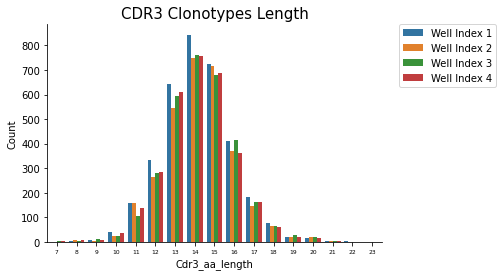

In [222]:
ax2 = sns.barplot(x=list_length,y=list_count,hue=list_sample,errwidth=0.5,capsize=0.5)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=-0,fontsize=6)
ax2.set_xlabel("Cdr3_aa_length", fontsize = 10)
ax2.set_ylabel("Count", fontsize = 10)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
plt.title("CDR3 Clonotypes Length", fontsize=15)
plt.legend(bbox_to_anchor=(1.05, 1),loc=2,borderaxespad=0)
plt.savefig(OUT_PATH +'/Length_barplot_Sample.pdf', dpi=300, bbox_inches="tight")
plt.show()

In [223]:
UMI_Counts = [70981, 68534, 59662, 60103,]
diversity = [1448.93, 1422.92, 1350.26, 1428.44,]
sample = ['Well Index 1', 'Well Index 2', 'Well Index 3', 'Well Index 4']

In [224]:
df = pd.DataFrame()
df['UMI_Counts'] = UMI_Counts
df['Clonotype_Diversity'] = diversity
df['Sample'] = sample

In [226]:
fig = px.scatter(
    df, # scatter绘制散点图
    x='UMI_Counts',    #  x轴
    y='Clonotype_Diversity',  # y轴
    color = 'Sample',
    labels = calc_corr(df["UMI_Counts"], df["Clonotype_Diversity"]),
    width=1280, height=1024,
)
fig.update_traces(marker_size=40)
fig.update_layout(title={"text":f'Human-PBMC Diversity (Correlation={calc_corr(df["UMI_Counts"], df["Clonotype_Diversity"])})',
                         'y':0.98, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'},
                  xaxis_title = "Mean UMI_Counts", yaxis_title = "Mean Clonotype_Diversity", font=dict(size=18,color="Black"))

fig.write_image(f"{OUT_PATH}/diversity_umi_scatter.png", scale=4)
#fig.show()